# Introduction

![alt text](https://drive.google.com/uc?id=1iHRKI3D4P1CT1EYeuN_3CPY8vRIRdZ0z) 


**This is a government PDF illustrating the current stages of response towards the COVID-19 epidemic.**

Just like every country , the focus is more on Stage-3 ( Lockdown ) and Stage-4 ( Surveillance and Testing ) as these play a major role in limiting the spread and effect of the virus.

This Notebook aims to use Exploratory Data Analyses (EDA) to provide insights and actionable conclusions towards the following topics :- 

- SA vs 'The World'
- Effectiveness of the Response ( A Broader look at stats ? )
- Easing the lockdown ( Is it really justified ? )
- Are we conducting enough tests?

Using the database created by EXPLORE DATA SCIENCE ACADEMY





# API Connection



In [0]:
#compulsory imports

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import math
import requests
import seaborn as sns

Build your dataframe using the following code:

```url = "INSERT API URL"``` <br>
```headers = {'x-api-key': "INSERT API KEY HERE"}```<br>
```response = requests.request("GET", url, headers=headers)```<br>
```x = response.json()```<br>
```df = pd.DataFrame(x)```


<br>
<br>


In [0]:
### Reading GlobalCases DataFrame

url = "https://9gnht4xyvf.execute-api.eu-west-1.amazonaws.com/api/get_table/CasesGlobalView"
headers = {
    'x-api-key': "WVllUkRA01awNNgKxGg607vl5qIvuOAN3pW9HXmD"
    }
response = requests.request("GET", url, headers=headers)
x = response.json()
df_global = pd.DataFrame(x)

In [0]:
### Reading CounterMeasures DataFrame


url = "https://9gnht4xyvf.execute-api.eu-west-1.amazonaws.com/api/get_table/CounterMeasureView"
headers = {
    'x-api-key': "WVllUkRA01awNNgKxGg607vl5qIvuOAN3pW9HXmD"
    }
response = requests.request("GET", url, headers=headers)
x = response.json()
df_measures = pd.DataFrame(x)


In [0]:
### Reading Local cases DataFrame


url = "https://9gnht4xyvf.execute-api.eu-west-1.amazonaws.com/api/get_table/CasesLocalView"
headers = {
    'x-api-key': "WVllUkRA01awNNgKxGg607vl5qIvuOAN3pW9HXmD"
    }
response = requests.request("GET", url, headers=headers)
x = response.json()
df_localview = pd.DataFrame(x)


In [0]:
### Reading Testing DataFrame


url = "https://9gnht4xyvf.execute-api.eu-west-1.amazonaws.com/api/get_table/Testing"
headers = {
    'x-api-key': "WVllUkRA01awNNgKxGg607vl5qIvuOAN3pW9HXmD"
    }
response = requests.request("GET", url, headers=headers)
x = response.json()
df_testing = pd.DataFrame(x)

# Data Pre-Processing

**Prelimenary exploration** ( Shape , Features , Null-values & Missing-Data)

Evidently the degree and consistency in documentation varies with each country and not all countries provide relevant insights , either due to the progress of the virus in that area or the extent of counter measures ( daily tests and consistent reports , etc )

Due to this the focus will be on Countries hard it by the virus and documented with consistency, i.e CHINA , ITALY , UK ,US , Spain ,Singapore and South Africa ( for comparison )

![alt text](https://drive.google.com/uc?id=1rGLCrzLDKxxjeF9yaJe6LKtgnsgkWQcm)

These are also the main countries used in Explore's Dashboard

1. Global Cases


In [0]:
relevant_list = ['South Africa' , 'Singapore' , 'China' ,'United Kingdom' ,     # Extracting Relevant countries
                 'US' ,'Spain' , 'Italy']
df_rel = df_global[df_global['country'].isin(relevant_list)]

print('Null count for each column :')                                           # Null, count and Shape
print(df_rel.isnull().sum())
print('The shape of the dataframe is' + ' ', df_rel.shape)

df_rel.head(2)                                                                  # First-2-Rows

Null count for each column :
date                                 0
country                              0
lat                                  0
long                                 0
confirmed                            0
deaths                               0
recovered                            0
active                               0
confirmed_daily                      7
deaths_daily                         7
recovered_daily                      7
daily_change_in_active_cases         7
active_dailiy_growth_rate           17
active_rolling_3_day_growth_rate    31
dtype: int64
The shape of the dataframe is  (530, 14)


,date,country,lat,long,confirmed,deaths,recovered,active,confirmed_daily,deaths_daily,recovered_daily,daily_change_in_active_cases,active_dailiy_growth_rate,active_rolling_3_day_growth_rate
1547,2020-01-22,China,32.828385,111.649082,548,17,28,503,NaN,NaN,NaN,NaN,NaN,NaN
1548,2020-01-23,China,32.828385,111.649082,643,18,30,595,95.0,1.0,2.0,92.0,0.182903,NaN


*The above pattern shows that there will be null values when data is first captured, i.e at the early stages of the virus. And these values can be safely filled with Zero*

In [0]:
df_relavent = df_rel.fillna(0)                                                  # Filling null values with Zero
df_global_relavent = df_relavent.copy()                                         # Create a copy using a more intuitive variable name
df_global_relavent.head(2)                                                      

,date,country,lat,long,confirmed,deaths,recovered,active,confirmed_daily,deaths_daily,recovered_daily,daily_change_in_active_cases,active_dailiy_growth_rate,active_rolling_3_day_growth_rate
1547,2020-01-22,China,32.828385,111.649082,548,17,28,503,0.0,0.0,0.0,0.0,0.000000,0.0
1548,2020-01-23,China,32.828385,111.649082,643,18,30,595,95.0,1.0,2.0,92.0,0.182903,0.0


2. Local Cases

In [0]:
print('Null count for each column :')                                           # Check for nulls , shape , features
print(df_localview.isnull().sum())
print('The shape of the dataframe is' + ' ', df_localview.shape)

df_localview.head(3)                                                            # First-3-Rows

Null count for each column :
id                0
country_id        0
location          0
location_level    0
date              0
confirmed         0
dtype: int64
The shape of the dataframe is  (400, 6)


,id,country_id,location,location_level,date,confirmed
0,1,153,EC,Provincial,2020-03-05,0
1,1,153,EC,Provincial,2020-03-07,0
2,1,153,EC,Provincial,2020-03-08,0


3. Local Testing

In [0]:
print('Null count for each column :')                                           # Check for nulls , Shape and Features
print(df_testing.isnull().sum())
print('The shape of the dataframes is' + ' ', df_testing.shape)

df_testing.head(3)                                                              # First-3-Rows

Null count for each column :
date                0
cumulative_tests    0
country             0
dtype: int64
The shape of the dataframes is  (47, 3)


,date,cumulative_tests,country
0,2020-02-11,61,South Africa
1,2020-02-13,67,South Africa
2,2020-02-14,71,South Africa


**Data Engineering ( Joins , Normalisations & Feature engineering )**


1. **Feature engineering - global relavent countries**

- Adding logarhithmic scales

  Infectious diseases don’t spread in an even, linear fashion. On a linear scale graph, the rate of growth keeps going up and up – the line can become almost vertical and appear to go on forever. That can create the impression that measures like social distancing aren’t working.

  Hence a logarithmic scale is ideal for measuring rates of change, particularly rates of growth and we prepare this by logging the metrics we might need for visualisations 

In [0]:
df_global_relavent['log_cases'] = np.log(df_global_relavent['confirmed'])       # Logging the key features
df_global_relavent['log_deaths'] = np.log(df_global_relavent['deaths'])
df_global_relavent['log_recovered'] = np.log(df_global_relavent['recovered'])
df_global_relavent['log_active'] = np.log(df_global_relavent['active'])

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


- Adding column for Day Since the 100th Case Recorded

  Using Datetime format is not ideal , since the virus began at different times for each country... so to avoid having unnessesary flat lines , we equate the axis 'zero' to the 100th case. 

  The dataframe is prepared accordingly

In [0]:
above_100 = df_global_relavent[df_global_relavent['confirmed'] > 100]           # Start reading from the 100th case

master_day_list = []
country_list = list(sorted(set(above_100['country'])))
for country in country_list :
    r = above_100[above_100['country'] == country ]
    r_dates = list(r['date'])
  
    y = range(len(r) + 1)
    o = list(y)
    h = o[1:]
    day_list = h
    master_day_list.append(day_list)

flat_list = [item for sublist in master_day_list for item in sublist]

above_100['day_from_100'] = flat_list
above_100.loc[7846 , 'day_from_100'] = 0.8                                      # Manual fix of the error that occurs when mapping flat-list
above_100.loc[7847 , 'day_from_100'] = 0.9
df_global_relavent_x = above_100.copy()                                         # Copy back to an intuitive variable name

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [0]:
df_global_relavent_x.head(3)

,date,country,lat,long,confirmed,deaths,recovered,active,confirmed_daily,deaths_daily,recovered_daily,daily_change_in_active_cases,active_dailiy_growth_rate,active_rolling_3_day_growth_rate,log_cases,log_deaths,log_recovered,log_active,day_from_100
1547,2020-01-22,China,32.828385,111.649082,548,17,28,503,0.0,0.0,0.0,0.0,0.000000,0.0,6.306275,2.833213,3.332205,6.220590,1.0
1548,2020-01-23,China,32.828385,111.649082,643,18,30,595,95.0,1.0,2.0,92.0,0.182903,0.0,6.466145,2.890372,3.401197,6.388561,2.0
1549,2020-01-24,China,32.828385,111.649082,920,26,36,858,277.0,8.0,6.0,263.0,0.442017,0.0,6.824374,3.258097,3.583519,6.754604,3.0


2. **Feature Engineering - Local Cases Issues**
> Upon inspection ,this dataframe has these following issues
    - Unsorted dates
    - Missing values for some dates ( i.e 04/07 and 03/27 )
    - Unknown locations
  


Let's Explore this in detail

In [0]:
df_localview.loc[29 : 31 , :]                                                   # Notice the zero in confirmed cases

,id,country_id,location,location_level,date,confirmed
29,1,153,EC,Provincial,2020-04-06,32
30,1,153,EC,Provincial,2020-04-07,0
31,1,153,EC,Provincial,2020-04-08,45


We replace the '0' with the average of the two values encompassing it

In [0]:
df_localview_mod = df_localview.drop(['id' , 'country_id' , 'location_level']
                    , axis = 1)
country_list = sorted(list(set(df_localview_mod['location'])))
column_names = ['location' , 'date' , 'confirmed']
df_empty = pd.DataFrame(columns = column_names)                                 # An empty dataframe

for country in country_list :
  temp_df = df_localview_mod[df_localview_mod['location'] == country]           # Looping each country
  df_localview_gen = temp_df.sort_values(by=['date'])
  
  pos_1 = df_localview_gen[df_localview_gen['date'] == '2020-03-27' ]           # Replacing the Zeros with Null Values , giving us access to fillna methods
  pos_2 = df_localview_gen[df_localview_gen['date'] == '2020-04-07' ]
  int_pos_1 = list(pos_1.index[pos_1['confirmed'] == 0])[0]
  int_pos_2 = list(pos_2.index[pos_2['confirmed'] == 0])[0]
  df_localview_gen.loc[[int_pos_1 , int_pos_2] ,['confirmed']] = None

  filled = pd.concat([df_localview_gen.ffill(), df_localview_gen.bfill()]
                     ).groupby(level=0).mean()                                  # Fill Nulls with Average values
  filled_list = list(map(math.floor, list(filled['confirmed'])))                # Round down the floats
  df_localview_gen['confirmed'] = sorted(filled_list)

  df_empty = df_empty.append(df_localview_gen)                                  


df_localview_x = df_empty.copy()                                                #  Create a copy using a more intuitive variable

In [0]:
master_day_list = []                                                            #  Add day count column ( Replacing date time format )
province_list = list(sorted(set(df_localview_x['location'])))                    
for province in province_list :
    r = df_localview_x[df_localview_x['location'] == province ]
    r_dates = list(r['date'])
  
    y = range(len(r) + 1)
    o = list(y)
    h = o[1:]
    day_list = h
    master_day_list.append(day_list)

flat_list = [item for sublist in master_day_list for item in sublist]

df_localview_x['day'] = flat_list

In [0]:
con = list(df_localview_x['confirmed'])[1:] + [list(df_localview_x['confirmed'] # Calculating the Reproductive number ( See Visualisation section for details)
            )[-1]]
con_1 = list(df_localview_x['confirmed'])
Ro = np.array(con)/np.array(con_1)

df_localview_x['Ro'] = Ro

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
df_localview_x.loc[29 : 31 , :]                                                 # Sample of fixed version

,location,date,confirmed,day,Ro
29,EC,2020-04-06,32,31,1.187500
30,EC,2020-04-07,38,32,1.184211
31,EC,2020-04-08,45,33,1.355556


3. **Feature Engineering - Local Testing and Global cases join**

> A useful dataframe would be a one with all the SA info in 'GlobalCases' Table including an additional testing column

Note : Local tests dataframe has the same issue of missing values , on two entries just like the local cases dataframe... and this is fixed accordingly



In [0]:
df_SA = df_relavent[df_relavent['country'] == 'South Africa']

df_extend = pd.merge(df_SA, df_testing, how='left' , on = 'date' ).sort_values( # Joining the two DataFrames
    by=['date']).drop(['lat' ,'long' ,'country_y'], axis = 1).rename(
    columns={'country_x':'country'}) 

pos_1 = df_extend[df_extend['date'] == '2020-03-25' ]                           # Replacing the Zeros with Null Values , giving us access to fillna methods
pos_2 = df_extend[df_extend['date'] == '2020-04-07' ]
int_pos_1 = list(pos_1.index[pos_1['cumulative_tests'] == 0])[0]
int_pos_2 = list(pos_2.index[pos_2['cumulative_tests'] == 0])[0]
df_extend.loc[[int_pos_1 , int_pos_2] ,['cumulative_tests']] = None

extend = pd.concat([df_extend.ffill(), df_extend.bfill()]).groupby(
         level=0).mean()                                                        # Fill Null values with averages 
extend_list = list(map(math.floor, list(extend['cumulative_tests'])))           # Round down the floats

df_extend['cumulative_tests'] = extend_list
  
y = range(len(df_extend) + 1)
o = list(y)
h = o[1:]
day_list = h

df_extend['day'] = day_list

df_allSA_ext = df_extend.copy()                                                 # Make a copy into a more recallable variable name

In [0]:
df_allSA_ext.head(3)                                                            # Sample view

,date,country,confirmed,deaths,recovered,active,confirmed_daily,deaths_daily,recovered_daily,daily_change_in_active_cases,active_dailiy_growth_rate,active_rolling_3_day_growth_rate,cumulative_tests,day
0,2020-03-05,South Africa,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,200,1
1,2020-03-06,South Africa,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,200,2
2,2020-03-07,South Africa,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,241,3


4. **Feature Engineering - Doubling times**

![alt text](https://drive.google.com/uc?id=1nPoDTetzVxQ8NTeIRMezWsr3ncx1XZ_1)

In [0]:
day = np.array(range(1,41))                                                     # Calculating doubling times using a modified version of the general equation
doubles_every_day = 100*(2)**day
doubles_every_2_days = 100*(2)**(day/2)
doubles_every_3_days = 100*(2)**(day/3) 
doubles_every_week = 100*(2)**(day/7)

data = {'day': day ,'doubles_every_day' : np.log(doubles_every_day),            # Logging all the lists
        'doubles_every_2_days':np.log(doubles_every_2_days) , 
        'doubles_every_3_days' : np.log(doubles_every_3_days),
        'doubles_every_week' : np.log(doubles_every_week)
         }


df_doubling_times = pd.DataFrame(data)                                          # Dataframe for Seaborn plot

In [0]:
df_doubling_times.head(2)                                                       # Sample visualiation

,day,doubles_every_day,doubles_every_2_days,doubles_every_3_days,doubles_every_week
0,1,5.298317,4.951744,4.836219,4.704191
1,2,5.991465,5.298317,5.067268,4.803212


All DataFrames are ready and now at this point , only great insights await us !!!

# Data Visualisation

TO RECAP . These are the data frames we have to work with...
- df_global_relavent_x ( Countries Hit hard by the virus and well documented )
  > Metrics tracked include
  - Confirmed cases , deaths , recoveries & active cases  all measured as a whole(Absolutes) and daily.
  - Daily growth rates and 3 day roll over growth rate

- df_localview_x ( Cumulative Confirmed cases per province in SA )

- df_allSA_ext ( Similar metrics to 'df_global_relavent_x' but focusing on SA and adding cumulative tests conducted )
- df_doubling_times ( Cases when the virus hypothetically doubles every 2 days , 3 days and every week )

1. **SA vs 'The World'**

In terms of growth rate where does SA stand among the world



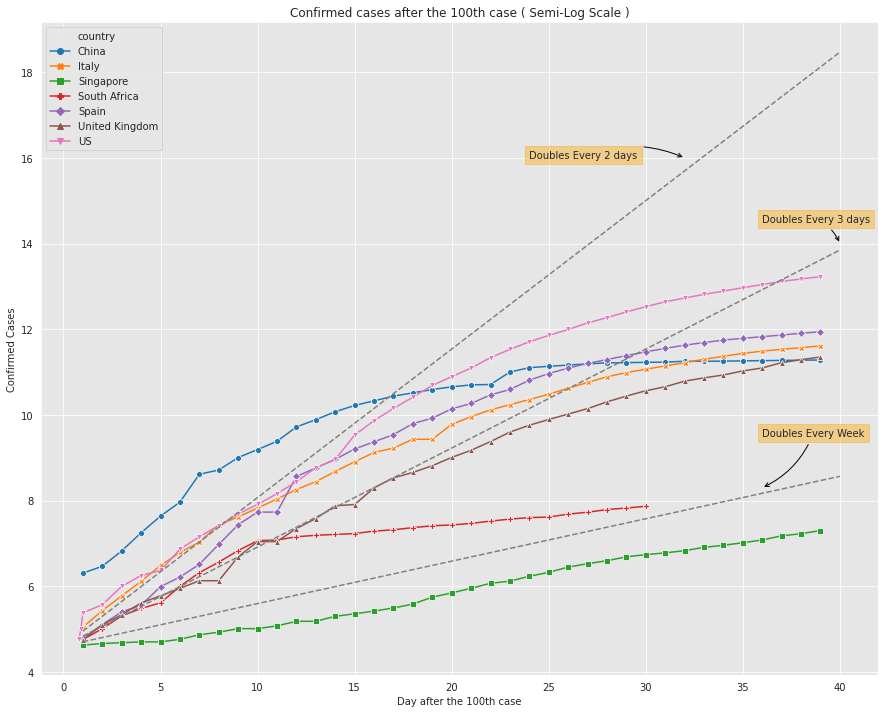

In [0]:
fig,ax = plt.subplots(figsize = (15 , 12))
df_global_relavent_plt = df_global_relavent_x[df_global_relavent_x[
                        'day_from_100'] < 40]                                   # Reasonable day limit , avoiding flat lines



sns.lineplot(x='day_from_100', y = 'log_cases', hue = 'country'
                  ,style = 'country',markers=True, dashes=False,
                  data = df_global_relavent_plt ,ax = ax)

x = np.array(df_doubling_times['day'])
y1 = np.array(df_doubling_times['doubles_every_week'])
y2 = np.array(df_doubling_times['doubles_every_2_days'])
y3 = np.array(df_doubling_times['doubles_every_3_days'])

plt.plot(x, y1,'--',color='grey' )
plt.plot(x , y2 ,'--',color='grey')
plt.plot(x , y3 ,'--',color='grey')

plt.annotate("Doubles Every Week", xy=(36, 8.3), xytext=(36, 9.5),
             arrowprops={'arrowstyle':'->', 'color': 'black', 
                         "connectionstyle":"arc3,rad=-0.2"},
             bbox={'pad':4, 'edgecolor':'orange', 'facecolor': 
                   'orange', 'alpha':0.4});

plt.annotate("Doubles Every 3 days", xy=(40, 14), xytext=(36, 14.5),
             arrowprops={'arrowstyle':'->', 'color': 'black', 
                         "connectionstyle":"arc3,rad=-0.2"},
             bbox={'pad':4, 'edgecolor':'orange', 'facecolor': 
                   'orange', 'alpha':0.4});

plt.annotate("Doubles Every 2 days", xy=(32, 16), xytext=(24, 16),
             arrowprops={'arrowstyle':'->', 'color': 'black', 
                         "connectionstyle":"arc3,rad=-0.2"},
             bbox={'pad':4, 'edgecolor':'orange', 'facecolor': 
                   'orange', 'alpha':0.4});




plt.xlabel('Day after the 100th case')
plt.ylabel('Confirmed Cases')
plt.title('Confirmed cases after the 100th case ( Semi-Log Scale )')

sns.set_style("darkgrid", {"axes.facecolor": ".9"})

**Key Insights**
- US has the most extreme growth rate ( Doubling every 2 days ) whilst Singapore is growing the least
- Most Countries growth Rate Doubles every 3 days
- South Africa's Growth rate currently doubles every week , and We would want that line to continue on it tragectory of flattening

2. **Effectiveness of the Response so far**

Zooming in to South Africa's stats at a broader level

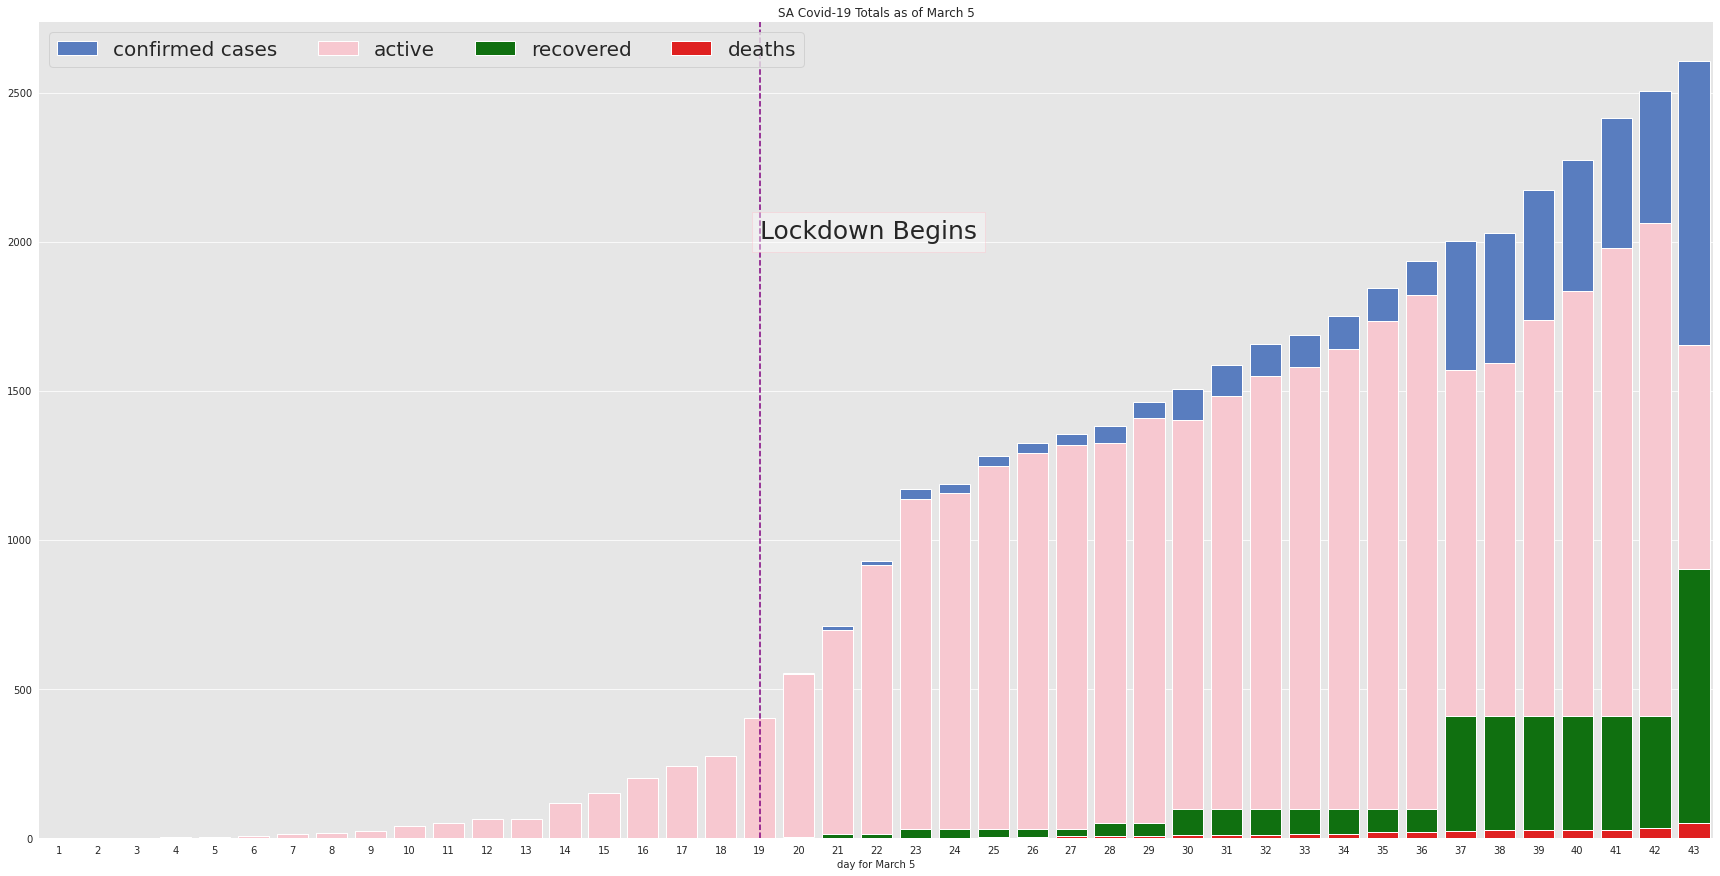

In [0]:
fig, ax = plt.subplots(figsize=(30, 15))


sns.barplot(x="day", y="confirmed", data=df_allSA_ext,
            label="confirmed cases", color="b")

sns.set_color_codes("dark")
sns.barplot(x="day", y="active", data=df_allSA_ext,
            label="active", color="pink")


sns.set_color_codes("muted")
sns.barplot(x="day", y="recovered", data=df_allSA_ext,
            label="recovered", color="green")

sns.set_color_codes("muted")
sns.barplot(x="day", y="deaths", data=df_allSA_ext,
            label="deaths", color="red")

plt.axvline(x= 18 , color = 'purple', ls = '--' )

plt.annotate("Lockdown Begins", xy=(18, 2000), xytext=(18, 2010),
             bbox={'pad':8, 'edgecolor':'pink', 'facecolor': 
                   'white', 'alpha':0.4} , size = 25);


# Add a legend and informative axis label
ax.legend(ncol=4, loc="upper left", frameon=True , fontsize = 20 )
ax.set(ylabel="",
       xlabel="day for March 5" ,title = 'SA Covid-19 Totals as of March 5')
sns.despine(left=True, bottom=True)

Key Insights
- Post Lockdown effected recoveries
- Deaths in SA are low
- Cases are still on the rise even though the rate is low
- The key is to have MORE green( Recoveries ) and LESS red ( Deaths )

3. **Easing the lockdown ( Is it really justified ? )**

![alt text](https://drive.google.com/uc?id=1_GR-b6SGltkoQGSK_Kh1DCm4d3xF43xn)

The government touched on the Reproductive number , but not in it's true sense as defined in epidemology .

Ro measures how quickly the virus spreads ( New cases / Existing cases ) for e.g Ro = 2 ,  means each person on average passes it to two other people

Lets investigate the Ro for each province in SA and compare it to the one predicted on the Research gate publication ( Link to this paper on the reference section ) and Ro estimated by the World Health Organisation ( WHO )

![alt text](https://drive.google.com/uc?id=15dvGXo5aA5pYWot5s8bkdK0XUVld6DTP)

Using the current local data we calculate Ro by dividing the 'Next' cumulative case value , with the previous value. Unfortunatly this is bound to lead to some Null vales due to division by Zero ( on some cases ) and a few other inconsistencies . 

But with a few filters we can get a comprehandable visualisation





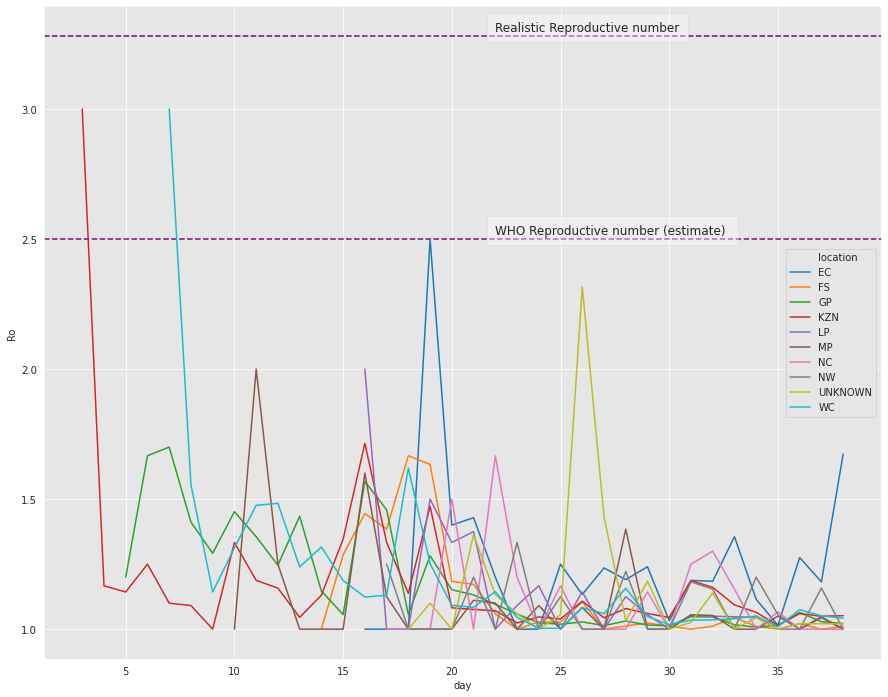

In [0]:
fig,ax = plt.subplots(figsize = (15 , 12))

df_localview_plt = df_localview_x[df_localview_x['confirmed'] > 1]              # Filter some noise and irrelevant data ( UNKNOWN ) and anchor to '1'
df_localview_plt = df_localview_plt[df_localview_plt['day'] < 39]

plt.axhline(y = 3.28 , color = 'purple', ls = '--' )                             # Realistic Reproductive number
plt.axhline(y = 2.5 , color = 'purple', ls = '--' )                              # WHO Reproductive number estimate

plt.annotate("WHO Reproductive number (estimate) ", xy=(22, 2.52)
             , xytext=(22, 2.52),bbox={'pad':8, 'edgecolor':'pink', 'facecolor': 
              'white', 'alpha':0.4} , size = 12)

plt.annotate("Realistic Reproductive number", xy=(22, 3.30), xytext=(22, 3.30),
             bbox={'pad':8, 'edgecolor':'pink', 'facecolor': 
                   'white', 'alpha':0.4} , size = 12)

sns.lineplot(x='day', y= 'Ro', hue = 'location'
                  ,markers=True, dashes=False,
                  data = df_localview_plt ,ax = ax)

Key Insights
- KZN and WC began spreading at an alarmingly high rate
- The overall spreading speed is decreasing with time ( likely because of the lockdown
- EC is having a surge in the spread of the virus , This accelation can be be seen in real time on data beyond the scope of this one. This should be investigated as why is the case

But overall ,easing the lockdown is justfied !


4. **Are we conductive enough tests ?**

In this exercise we will use a HeatMap to try and find metrics with high correlation to tests , and use these as our base metric for keeping track of tests and see if we slacking or not

Quick note on how to read heat maps
- A value of 1 or -1 means two metrics are perfectly correlated
- The closer the value these extremes , the better the correlation
- Closer to 1 = Positive correlation
- Closer to -1 = Negetive correlation


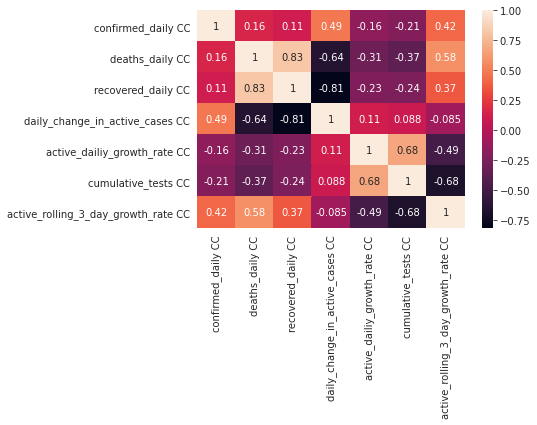

In [0]:
### Do a heat map , find what is more correlated to tests...( among daily data)

pc = df_allSA_ext[['confirmed_daily','deaths_daily','recovered_daily'
             ,'daily_change_in_active_cases', 'active_dailiy_growth_rate'
              ,'active_rolling_3_day_growth_rate','cumulative_tests']
              ].corr(method ='pearson')

cols = ['confirmed_daily CC','deaths_daily CC','recovered_daily CC'
       ,'daily_change_in_active_cases CC', 'active_dailiy_growth_rate CC',
       'cumulative_tests CC','active_rolling_3_day_growth_rate CC']

ax = sns.heatmap(pc, annot=True,
                 yticklabels=cols,
                 xticklabels=cols,
                 annot_kws={'size': 10})

The tricky part with Heatmaps is that they give you a statistical value , and the onus is on you to interpret the data

One metric which is highly correlated to cumulative tests is the **Active daily growth rate**...

- If the daily growth rate is constant it could mean either
  > The virus spread has slowed down or
  
  > Not enough tests are done , hence some positive cases go unaccounted for

Now assuming the second point , if the virus is still in its infancy ( Like here in SA ) ... an exponential trajectory is expected, if we not seeing it, its likely that not enough tests are done

# References

1. https://ijvcpr9af1.execute-api.eu-west-1.amazonaws.com/api/
2. https://sacoronavirus.co.za/2020/04/13/sas-covid-19-epidemic-trends-next-steps/
3. https://www.researchgate.net/publication/339272432_The_reproductive_number_of_COVID-19_is_higher_compared_to_SARS_coronavirus
4. https://www.varsitytutors.com/hotmath/hotmath_help/topics/exponential-growth
5. https://statisticsbyjim.com/basics/correlations/
